<a href="https://colab.research.google.com/github/MWANIKID/PhD-Research-files/blob/main/1.%20Pre_Processing24.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# -*- coding: utf-8 -*-
"""Untitled22.ipynb

Automatically generated by Colab.

Original file is located at
    https://colab.research.google.com/drive/1E_4Zan7X9ctMYbB1egRMT7zCC_I772Vi
"""

from pathlib import Path

# Generate a Google Colab-compatible Python notebook
from nbformat import v4 as nbf

notebook = nbf.new_notebook()
cells = []

# Header
cells.append(nbf.new_markdown_cell("# 📈 Bitcoin & Tesla Stock Forecasting with ARIMA, LSTM & Hybrid Models\n"
                                   "**Dataset:** `Bitcoin_data.csv`, `Tesla_stock.csv`\n\n"
                                   "This notebook follows the full methodology of the hybrid ARIMA-LSTM modeling for price prediction as outlined in the thesis."))

# 1. Install Dependencies
cells.append(nbf.new_code_cell("""\
!pip install yfinance
!pip install keras
!pip install statsmodels
!pip install scikit-learn
!pip install matplotlib seaborn
"""))

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Create directories for output
dirs = ['figures/bitcoin', 'figures/tesla', 'tables/bitcoin', 'tables/tesla', 'models']
for d in dirs:
    os.makedirs(d, exist_ok=True)

# Create directories for output
dirs = ['figures/bitcoin', 'figures/tesla', 'tables/bitcoin', 'tables/tesla', 'models']
for d in dirs:
    os.makedirs(d, exist_ok=True)

In [2]:
from google.colab import files
uploaded = files.upload()


Saving Tesla_stock.csv to Tesla_stock.csv
Saving Bitcoin_data.csv to Bitcoin_data.csv


In [5]:
# Load datasets with proper parsing for 'dd/mm/yyyy' format
btc = pd.read_csv("Bitcoin_data.csv", parse_dates=["Date"], date_format="%d/%m/%Y")
tesla = pd.read_csv("Tesla_stock.csv", parse_dates=["Date"], date_format="%d/%m/%Y")


In [6]:
# Set date index
btc.set_index("Date", inplace=True)
tesla.set_index("Date", inplace=True)

btc.dropna(inplace=True)
tesla.dropna(inplace=True)

# Define filter range
start_date = pd.to_datetime("01-10-2014", format="%d-%m-%Y")
end_date = pd.to_datetime("30-12-2024", format="%d-%m-%Y")

# Filter data
btc = btc[(btc.index >= start_date) & (btc.index <= end_date)]
tesla = tesla[(tesla.index >= start_date) & (tesla.index <= end_date)]


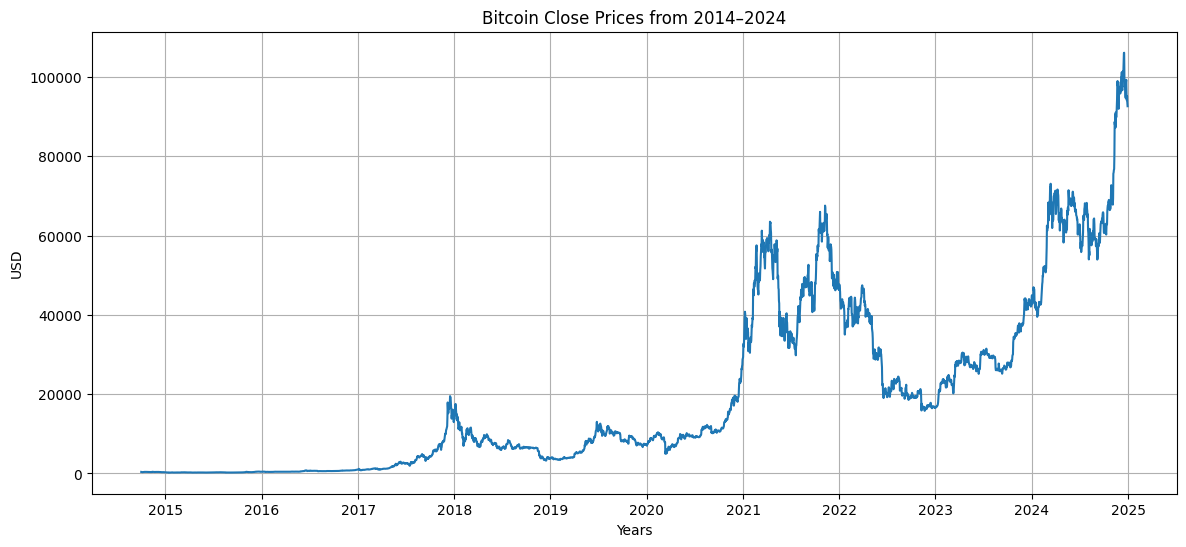

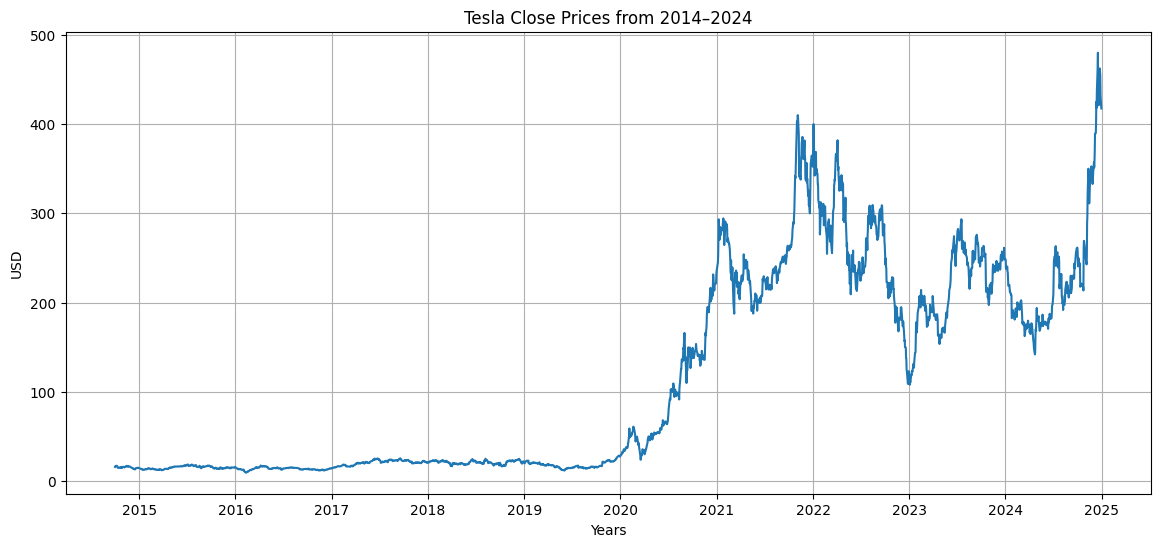

<ipython-input-7-d6b28c57c73c>:46: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly = df['Close'].resample('M').mean()
<ipython-input-7-d6b28c57c73c>:48: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  yearly = df['Close'].resample('Y').mean()


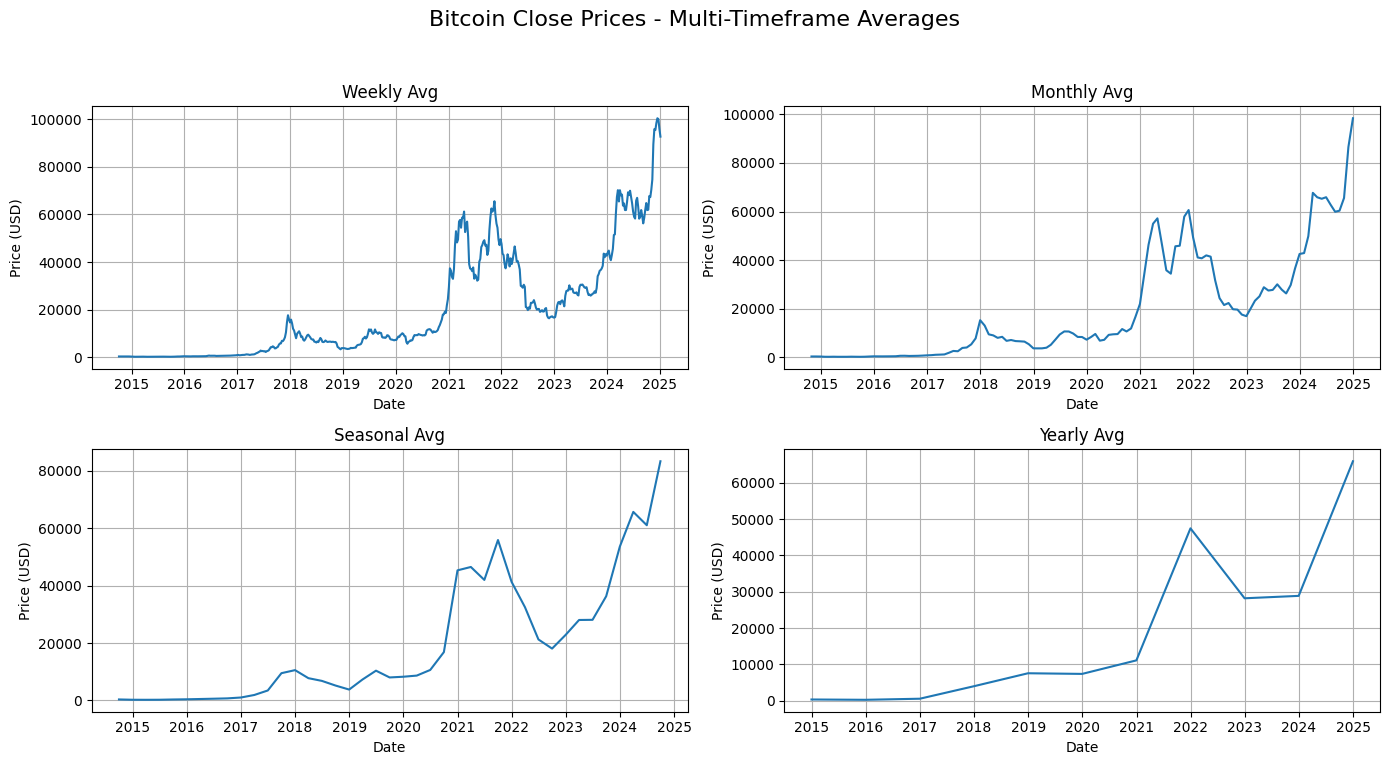

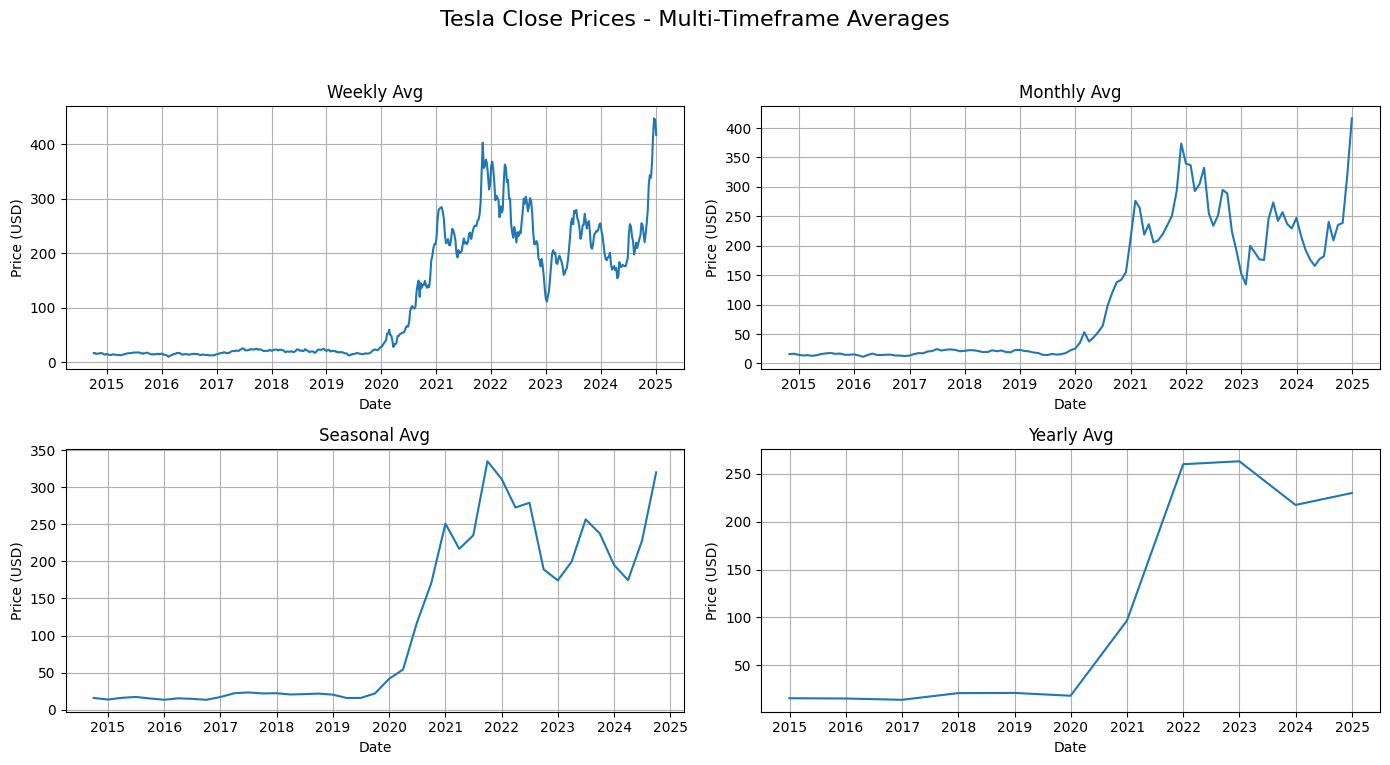

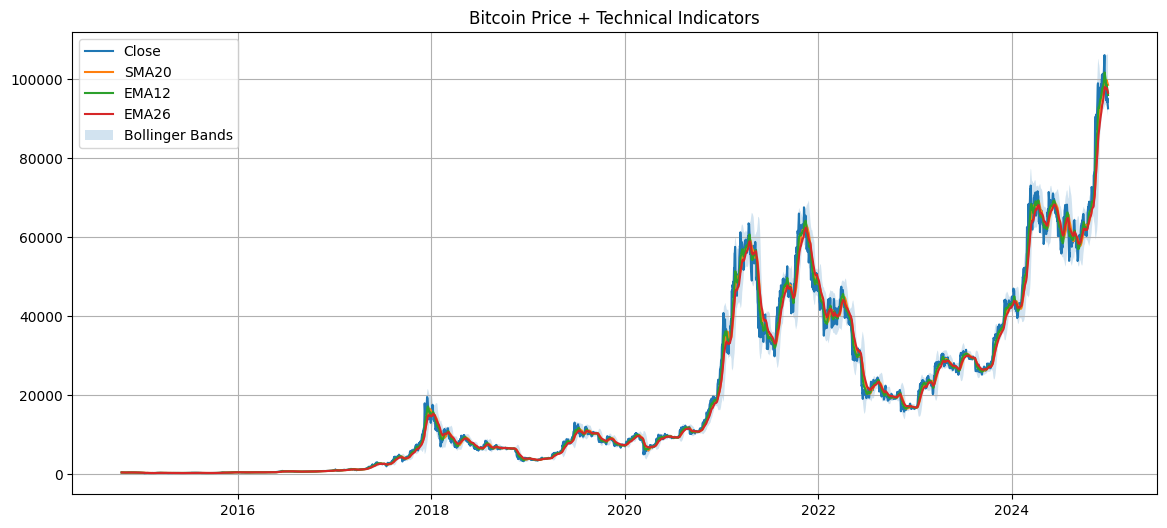

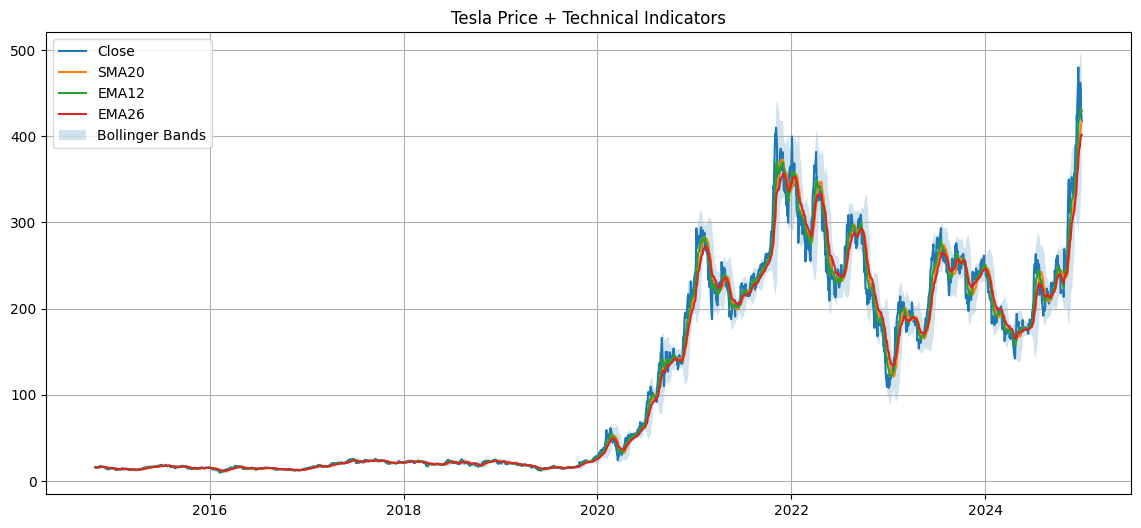

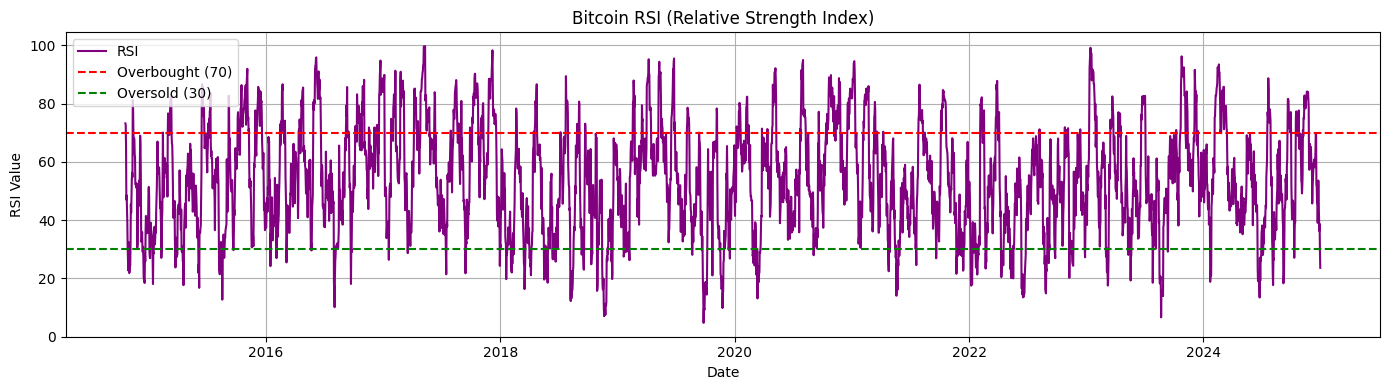

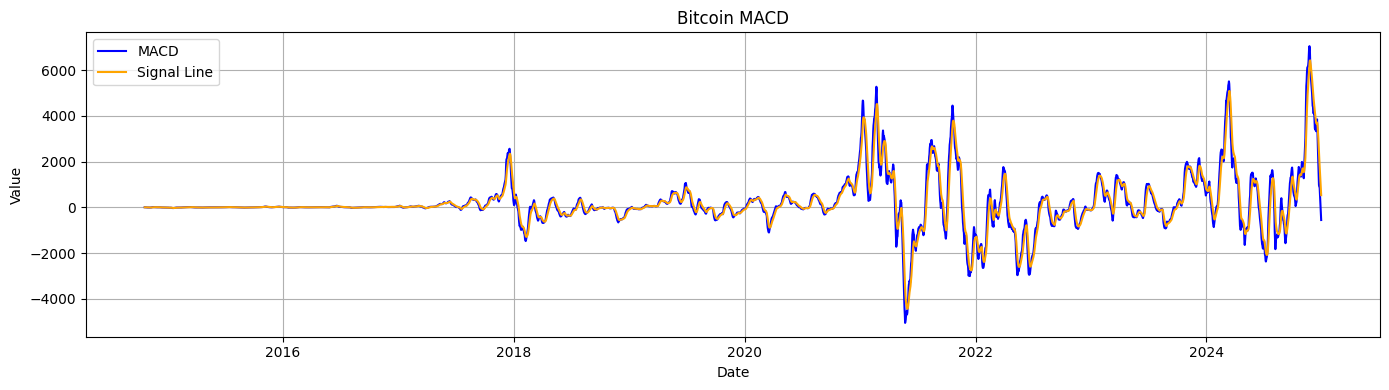

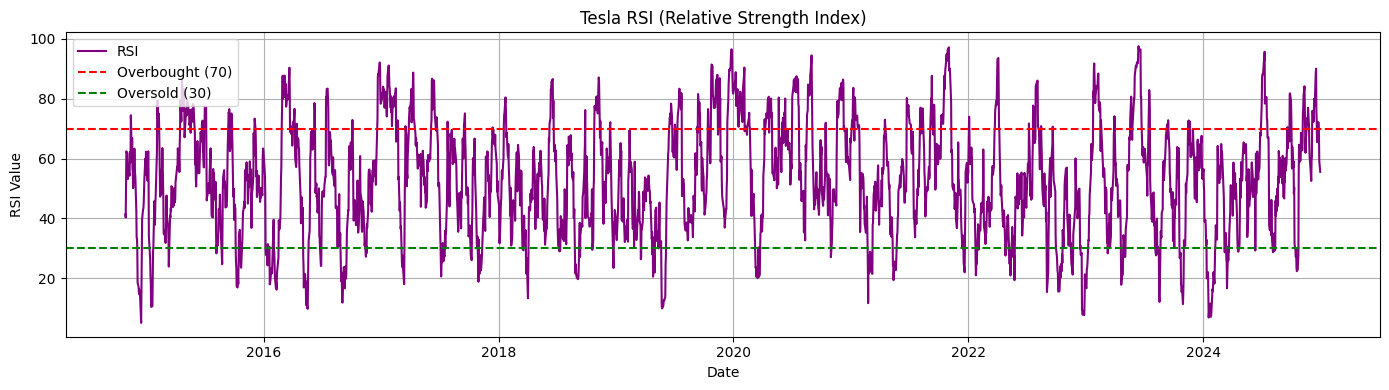

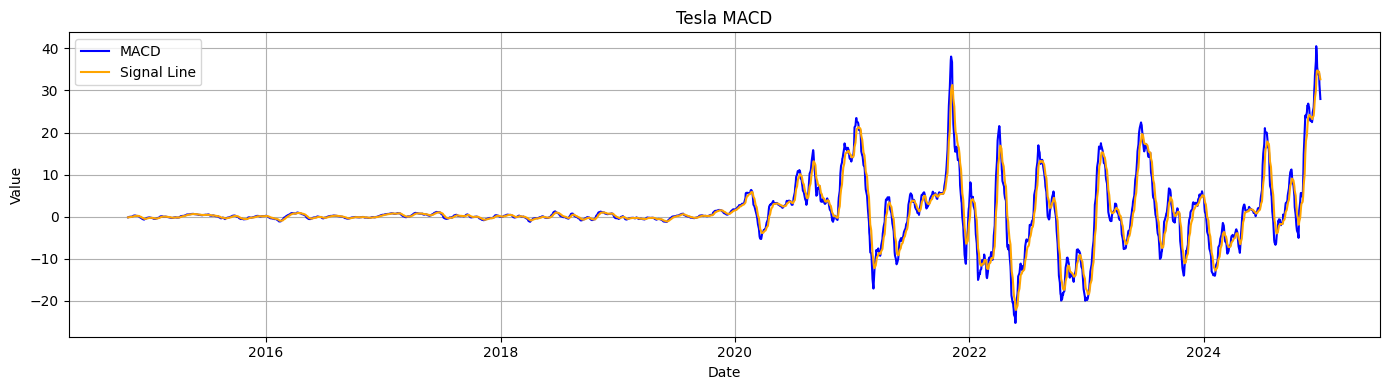

<ipython-input-7-d6b28c57c73c>:152: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df.applymap(lambda x: f"{x:,.6f}" if isinstance(x, float) else x)


In [7]:
# Load datasets with proper date format
import pandas as pd

btc = pd.read_csv("Bitcoin_data.csv", parse_dates=["Date"], date_format="%d/%m/%Y")
tesla = pd.read_csv("Tesla_stock.csv", parse_dates=["Date"], date_format="%d/%m/%Y")

# Set date index
btc.set_index("Date", inplace=True)
tesla.set_index("Date", inplace=True)

# Drop missing values
btc.dropna(inplace=True)
tesla.dropna(inplace=True)

# Filter data by date range
start_date = pd.to_datetime("01-10-2014", format="%d-%m-%Y")
end_date = pd.to_datetime("30-12-2024", format="%d-%m-%Y")

btc = btc[(btc.index >= start_date) & (btc.index <= end_date)]
tesla = tesla[(tesla.index >= start_date) & (tesla.index <= end_date)]

# Ensure output directories exist
import os
for d in ["figures/bitcoin", "figures/tesla", "tables/bitcoin", "tables/tesla"]:
    os.makedirs(d, exist_ok=True)

# Plot Close Price for both
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

for name, df in zip(["bitcoin", "tesla"], [btc, tesla]):
    plt.figure(figsize=(14, 6))
    plt.plot(df.index, df["Close"], label="Close Price")
    plt.title(f"{name.capitalize()} Close Prices from 2014–2024")
    plt.xlabel("Years")
    plt.ylabel("USD")
    plt.grid(True)
    plt.gca().xaxis.set_major_locator(mdates.YearLocator())
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    plt.savefig(f"figures/{name}/{name}_close_full.png")
    plt.show()

# Multi-timeframe averages
for name, df in zip(["bitcoin", "tesla"], [btc.copy(), tesla.copy()]):
    weekly = df['Close'].resample('W').mean()
    monthly = df['Close'].resample('M').mean()
    seasonal = df['Close'].resample('QS').mean()
    yearly = df['Close'].resample('Y').mean()

    fig, axs = plt.subplots(2, 2, figsize=(14, 8))
    axs[0, 0].plot(weekly); axs[0, 0].set_title("Weekly Avg")
    axs[0, 1].plot(monthly); axs[0, 1].set_title("Monthly Avg")
    axs[1, 0].plot(seasonal); axs[1, 0].set_title("Seasonal Avg")
    axs[1, 1].plot(yearly); axs[1, 1].set_title("Yearly Avg")

    for ax in axs.flat:
        ax.set_xlabel("Date")
        ax.set_ylabel("Price (USD)")
        ax.grid(True)
        ax.xaxis.set_major_locator(mdates.YearLocator())
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

    fig.suptitle(f"{name.capitalize()} Close Prices - Multi-Timeframe Averages", fontsize=16)
    fig.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.savefig(f"figures/{name}/{name}_timeframe_averages.png")
    plt.show()

# Compute technical indicators
def compute_indicators(df):
    df = df.copy()
    df['SMA20'] = df['Close'].rolling(window=20).mean()
    df['EMA12'] = df['Close'].ewm(span=12, adjust=False).mean()
    df['EMA26'] = df['Close'].ewm(span=26, adjust=False).mean()
    df['BB_upper'] = df['SMA20'] + 2 * df['Close'].rolling(window=20).std()
    df['BB_lower'] = df['SMA20'] - 2 * df['Close'].rolling(window=20).std()
    df['MACD'] = df['EMA12'] - df['EMA26']
    df['Signal'] = df['MACD'].ewm(span=9, adjust=False).mean()

    delta = df['Close'].diff()
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)
    avg_gain = gain.rolling(window=14).mean()
    avg_loss = loss.rolling(window=14).mean()
    rs = avg_gain / avg_loss
    df['RSI'] = 100 - (100 / (1 + rs))
    return df.dropna()

btc_ind = compute_indicators(btc)
tesla_ind = compute_indicators(tesla)

btc_ind.to_csv("tables/bitcoin/technical_indicators.csv")
tesla_ind.to_csv("tables/tesla/technical_indicators.csv")

# Plot technical indicators
def plot_tech_indicators(df, name):
    plt.figure(figsize=(14,6))
    plt.plot(df['Close'], label='Close')
    plt.plot(df['SMA20'], label='SMA20')
    plt.plot(df['EMA12'], label='EMA12')
    plt.plot(df['EMA26'], label='EMA26')
    plt.fill_between(df.index, df['BB_upper'], df['BB_lower'], alpha=0.2, label='Bollinger Bands')
    plt.title(f"{name.capitalize()} Price + Technical Indicators")
    plt.legend()
    plt.grid(True)
    plt.savefig(f"figures/{name}/{name}_technical_indicators.png")
    plt.show()

plot_tech_indicators(btc_ind, "bitcoin")
plot_tech_indicators(tesla_ind, "tesla")

# Plot RSI and MACD
def plot_rsi(df, name):
    plt.figure(figsize=(14, 4))
    plt.plot(df['RSI'], label='RSI', color='purple')
    plt.axhline(70, linestyle='--', color='red', label='Overbought (70)')
    plt.axhline(30, linestyle='--', color='green', label='Oversold (30)')
    plt.title(f"{name.capitalize()} RSI (Relative Strength Index)")
    plt.xlabel("Date")
    plt.ylabel("RSI Value")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(f"figures/{name}/{name}_RSI.png")
    plt.show()

def plot_macd(df, name):
    plt.figure(figsize=(14, 4))
    plt.plot(df['MACD'], label='MACD', color='blue')
    plt.plot(df['Signal'], label='Signal Line', color='orange')
    plt.title(f"{name.capitalize()} MACD")
    plt.xlabel("Date")
    plt.ylabel("Value")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(f"figures/{name}/{name}_MACD.png")
    plt.show()

plot_rsi(btc_ind, "bitcoin")
plot_macd(btc_ind, "bitcoin")
plot_rsi(tesla_ind, "tesla")
plot_macd(tesla_ind, "tesla")

# Summary statistics
btc['Volume'] = pd.to_numeric(btc['Volume'].astype(str).str.replace(',', ''), errors='coerce')
tesla['Volume'] = pd.to_numeric(tesla['Volume'].astype(str).str.replace(',', ''), errors='coerce')

btc_summary = btc[['Open', 'High', 'Low', 'Close', 'Volume']].describe()
tesla_summary = tesla[['Open', 'High', 'Low', 'Close', 'Volume']].describe()

def format_stats(df):
    return df.applymap(lambda x: f"{x:,.6f}" if isinstance(x, float) else x)

btc_summary_formatted = format_stats(btc_summary)
tesla_summary_formatted = format_stats(tesla_summary)

btc_summary_formatted.to_csv("tables/bitcoin/bitcoin_summary_stats.csv")
tesla_summary_formatted.to_csv("tables/tesla/tesla_summary_stats.csv")


In [8]:
btc_p1 = ('2014-10-01', '2019-08-31')
btc_p2 = ('2019-09-01', '2024-12-30')
btc_p3 = ('2014-10-01', '2024-12-30')

tesla_p1 = ('2014-10-01', '2019-06-30')
tesla_p2 = ('2019-07-01', '2024-12-30')
tesla_p3 = ('2014-10-01', '2024-12-30')


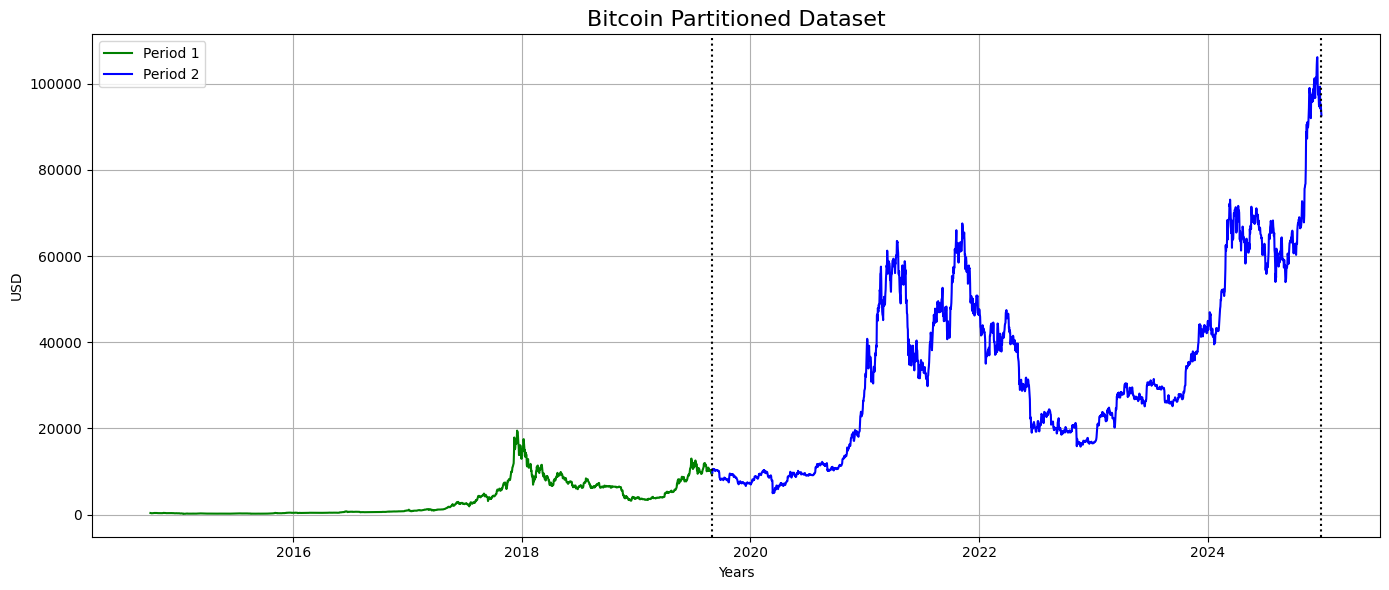

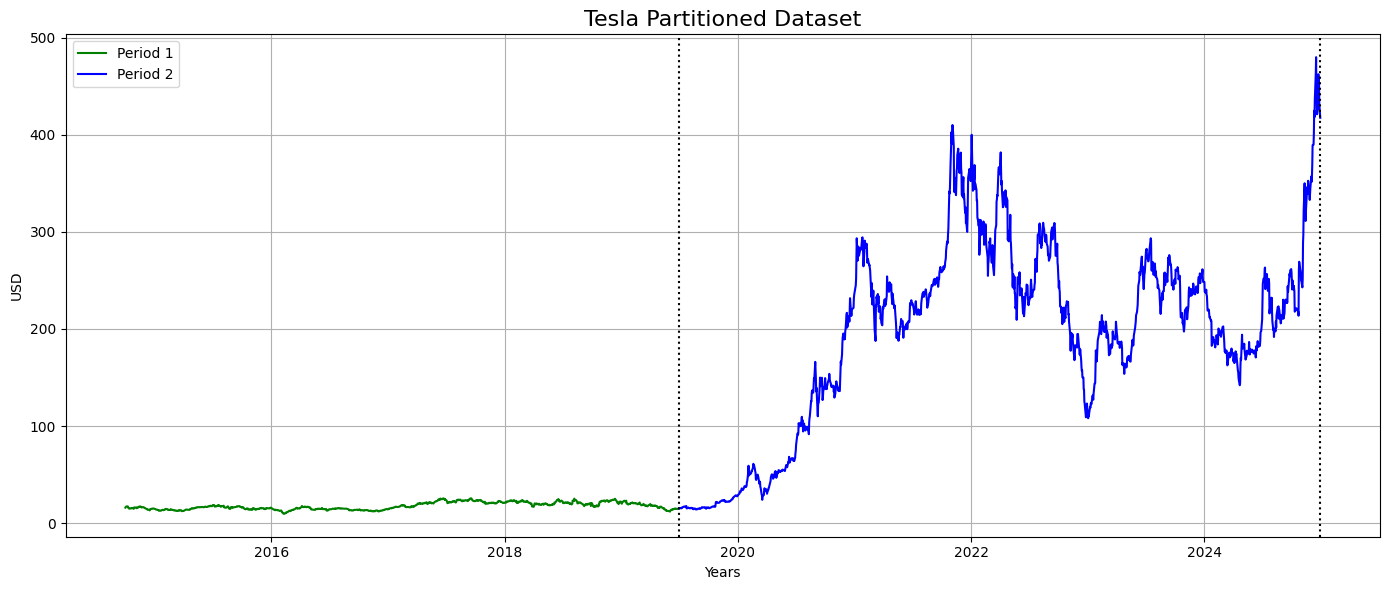

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Ensure datetime index
btc.index = pd.to_datetime(btc.index, dayfirst=True)
tesla.index = pd.to_datetime(tesla.index, dayfirst=True)

# Create output directory
os.makedirs("figures", exist_ok=True)

# --- Final Partition Dates (up to end of 2024) ---
btc_p1 = ('2014-10-01', '2019-08-31')
btc_p2 = ('2019-09-01', '2024-12-30')
btc_p3 = ('2014-10-01', '2024-12-30')

tesla_p1 = ('2014-10-01', '2019-06-30')
tesla_p2 = ('2019-07-01', '2024-12-30')
tesla_p3 = ('2014-10-01', '2024-12-30')

# --- Function to Plot Partitioned Dataset ---
def plot_partitioned(df, p1, p2, full_range, title, filename):
    # Subsets
    df1 = df.loc[p1[0]:p1[1]]
    df2 = df.loc[p2[0]:p2[1]]

    # Plotting
    plt.figure(figsize=(14,6))
    plt.plot(df1.index, df1['Close'], color='green', label='Period 1')
    plt.plot(df2.index, df2['Close'], color='blue', label='Period 2')

    # Partition dividers
    for date in [p1[1], p2[1]]:
        plt.axvline(pd.to_datetime(date), linestyle='dotted', color='black')

    # Labels and layout
    plt.title(f"{title} Partitioned Dataset", fontsize=16)
    plt.xlabel("Years")
    plt.ylabel("USD")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()

    # Save + show
    path = f"figures/{filename}.png"
    plt.savefig(path)
    plt.show()

# --- Apply for BTC and Tesla ---
plot_partitioned(btc, btc_p1, btc_p2, btc_p3, "Bitcoin", "btc_partitioned")
plot_partitioned(tesla, tesla_p1, tesla_p2, tesla_p3, "Tesla", "tesla_partitioned")


In [14]:
!pip install pmdarima


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 19.2 MB/s eta 0:00:00


In [1]:
!pip install numpy==1.23.5


In [ ]:
!pip install --force-reinstall --no-cache-dir pmdarima


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 13.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 183.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 52.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 240.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.7/307.7 kB 303.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 183.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.5/66.5 kB 247.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 239.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 245.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.6/37.6 MB 191.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 226.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 

In [2]:
import pandas as pd

# Upload your CSVs again if needed
btc = pd.read_csv("Bitcoin_data.csv")
tesla = pd.read_csv("Tesla_stock.csv")

# Convert to datetime index
btc['Date'] = pd.to_datetime(btc['Date'], dayfirst=True)
tesla['Date'] = pd.to_datetime(tesla['Date'], dayfirst=True)

btc.set_index('Date', inplace=True)
tesla.set_index('Date', inplace=True)


In [5]:
# Define Bitcoin periods with adjusted range (2014-10-01 to 2024-12-30)
periods = {
    'Period 1': ('2014-10-01', '2019-08-31'),
    'Period 2': ('2019-09-01', '2024-12-30'),
    'Period 3': ('2014-10-01', '2024-12-30'),
}


--- Period 1 (2014-10-01 to 2019-08-31) ---


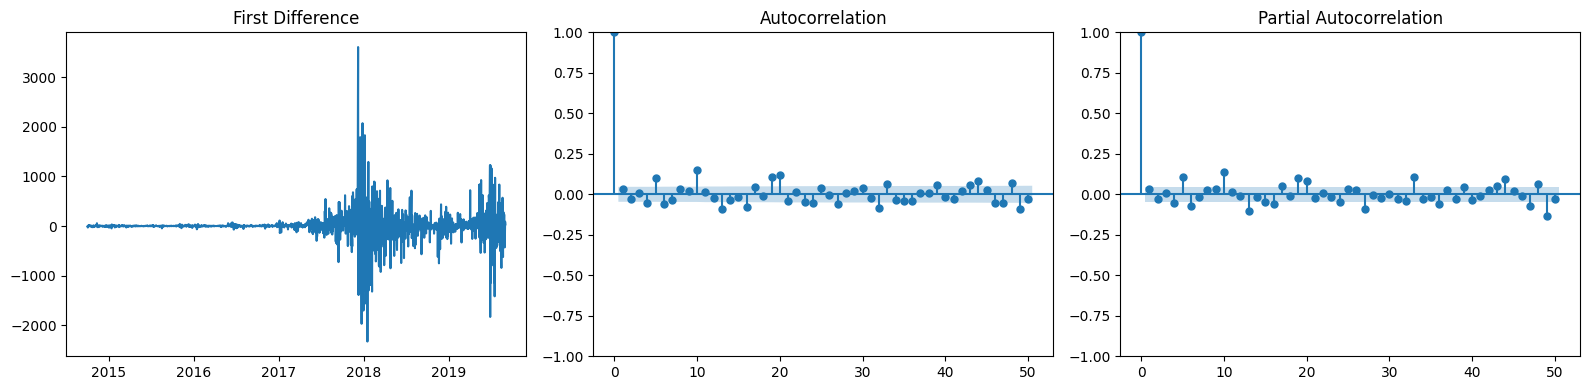


🔍 Top 3 ARIMA models for Period 1:
  Top 1: Order=(10, 1, 8), AIC=25228.322
  Top 2: Order=(9, 1, 8), AIC=25238.946
  Top 3: Order=(9, 1, 10), AIC=25239.133

--- Period 2 (2019-09-01 to 2024-12-30) ---


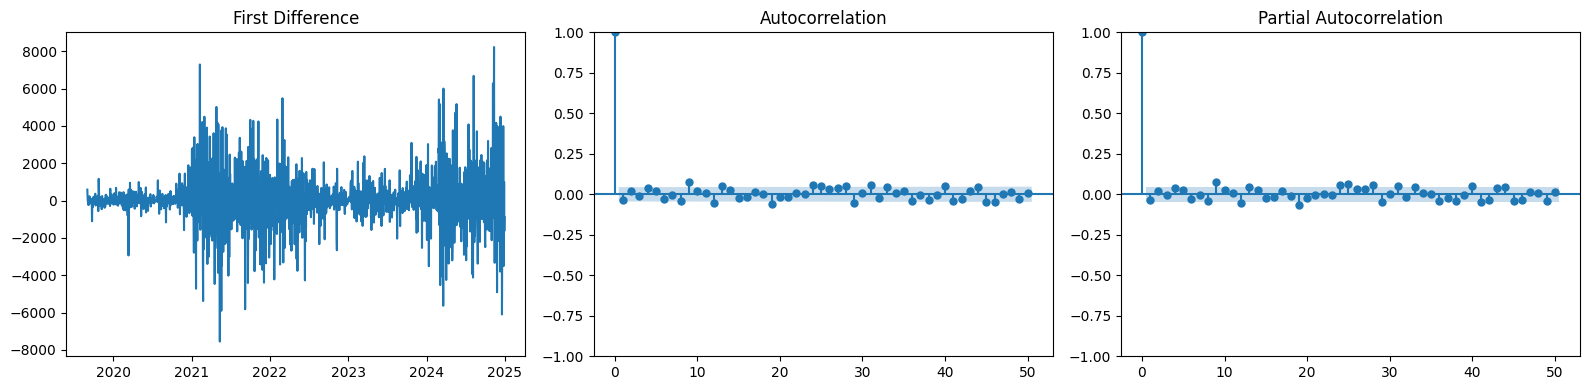


🔍 Top 3 ARIMA models for Period 2:
  Top 1: Order=(8, 1, 9), AIC=33366.128
  Top 2: Order=(10, 1, 8), AIC=33367.297
  Top 3: Order=(9, 1, 9), AIC=33368.268

--- Period 3 (2014-10-01 to 2024-12-30) ---


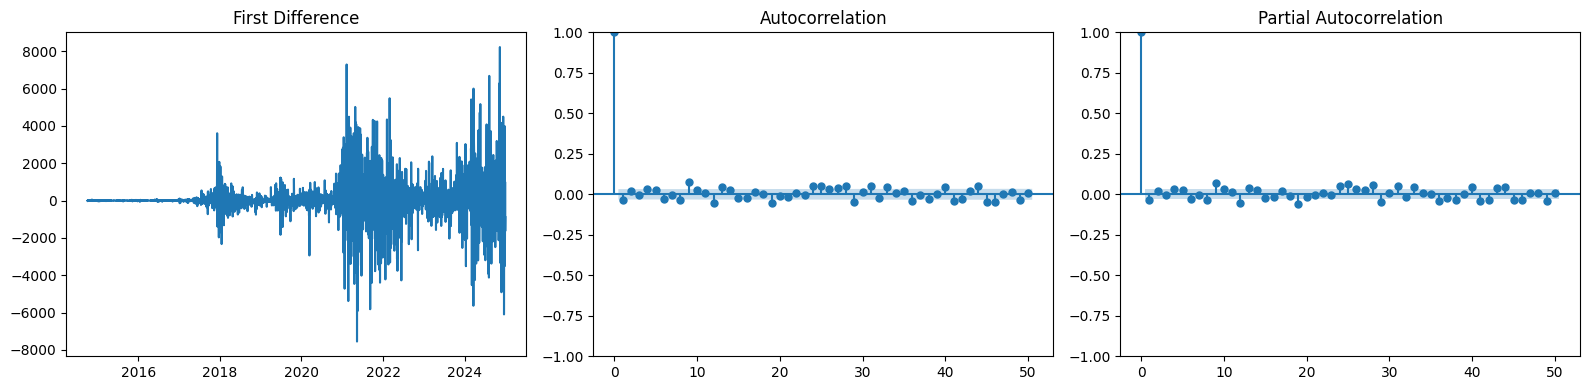


🔍 Top 3 ARIMA models for Period 3:
  Top 1: Order=(10, 1, 9), AIC=61832.672
  Top 2: Order=(9, 1, 8), AIC=61838.367
  Top 3: Order=(8, 1, 9), AIC=61839.293


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import os
import warnings
warnings.filterwarnings("ignore")

# Ensure datetime index is parsed correctly
btc.index = pd.to_datetime(btc.index, dayfirst=True)

# Ensure directory exists
os.makedirs("figures", exist_ok=True)

# ✅ Adjusted date periods to match 2014–2024 filter
periods = {
    'Period 1': ('2014-10-01', '2019-08-31'),
    'Period 2': ('2019-09-01', '2024-12-30'),
    'Period 3': ('2014-10-01', '2024-12-30'),
}

# --- ACF, PACF, First Difference Plot ---
def plot_acf_pacf_first_diff(df, label):
    diff = df.diff().dropna()

    fig, axs = plt.subplots(1, 3, figsize=(16, 4))

    axs[0].plot(diff)
    axs[0].set_title("First Difference")

    plot_acf(diff, ax=axs[1], lags=50)
    axs[1].set_title("Autocorrelation")

    plot_pacf(diff, ax=axs[2], lags=50)
    axs[2].set_title("Partial Autocorrelation")

    plt.tight_layout()
    path = f"figures/bitcoin_{label.replace(' ', '_').lower()}_acf_pacf_diff.png"
    plt.savefig(path)
    plt.show()

# --- Grid Search for ARIMA(p,1,q) ---
def grid_search_arima(df, label):
    results = []
    for p in range(6, 11):
        for q in range(6, 11):
            try:
                model = ARIMA(df, order=(p, 1, q)).fit()
                results.append(((p, 1, q), model.aic))
            except:
                continue
    sorted_models = sorted(results, key=lambda x: x[1])
    print(f"\n🔍 Top 3 ARIMA models for {label}:")
    for i, (params, aic) in enumerate(sorted_models[:3], 1):
        print(f"  Top {i}: Order={params}, AIC={aic:.3f}")
    return sorted_models[:3]

# --- Run for BTC Close Price over each adjusted period ---
for label, (start, end) in periods.items():
    print(f"\n--- {label} ({start} to {end}) ---")
    close = btc['Close'].loc[start:end].dropna()

    plot_acf_pacf_first_diff(close, label)
    grid_search_arima(close, label)



--- Period 1 (2014-10-01 to 2019-06-30) ---


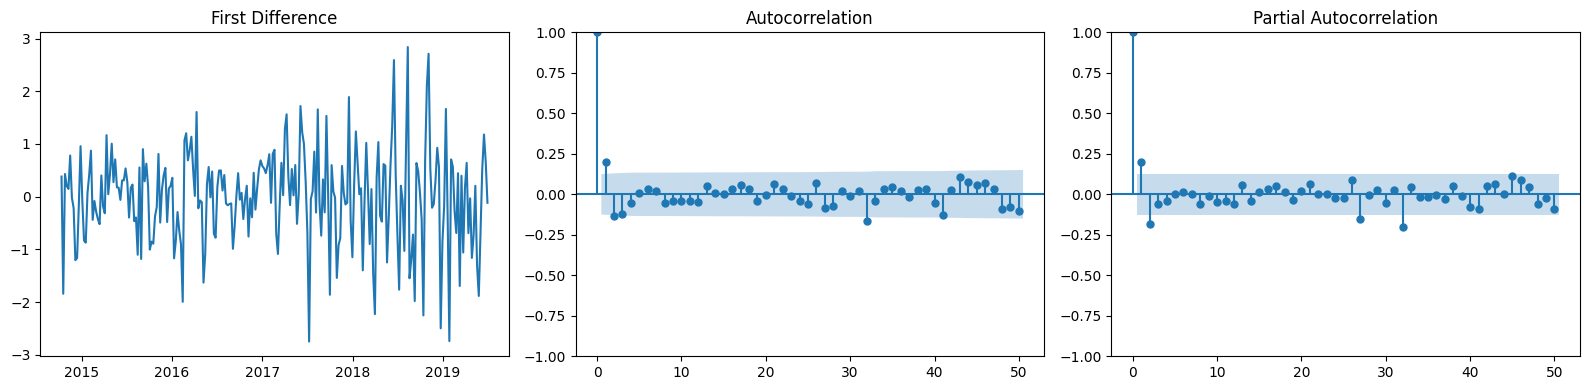


🔍 Top 3 ARIMA models for Period 1:
  Top 1: Order=(7, 1, 8), AIC=641.108
  Top 2: Order=(6, 1, 6), AIC=645.513
  Top 3: Order=(8, 1, 6), AIC=645.695

--- Period 2 (2019-07-01 to 2024-12-30) ---


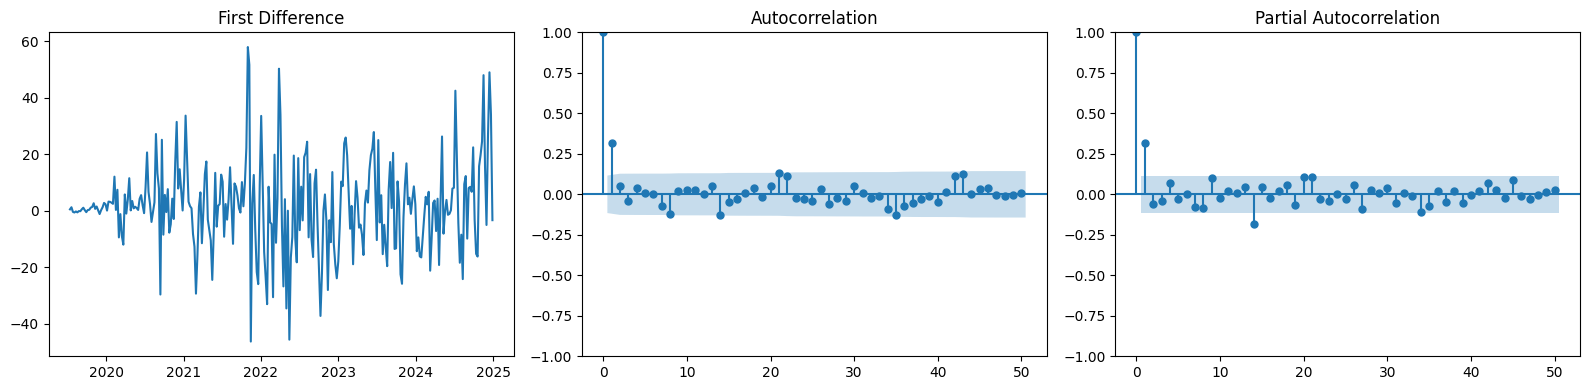


🔍 Top 3 ARIMA models for Period 2:
  Top 1: Order=(6, 1, 7), AIC=2345.246
  Top 2: Order=(6, 1, 8), AIC=2345.509
  Top 3: Order=(8, 1, 7), AIC=2347.520

--- Period 3 (2014-10-01 to 2024-12-30) ---


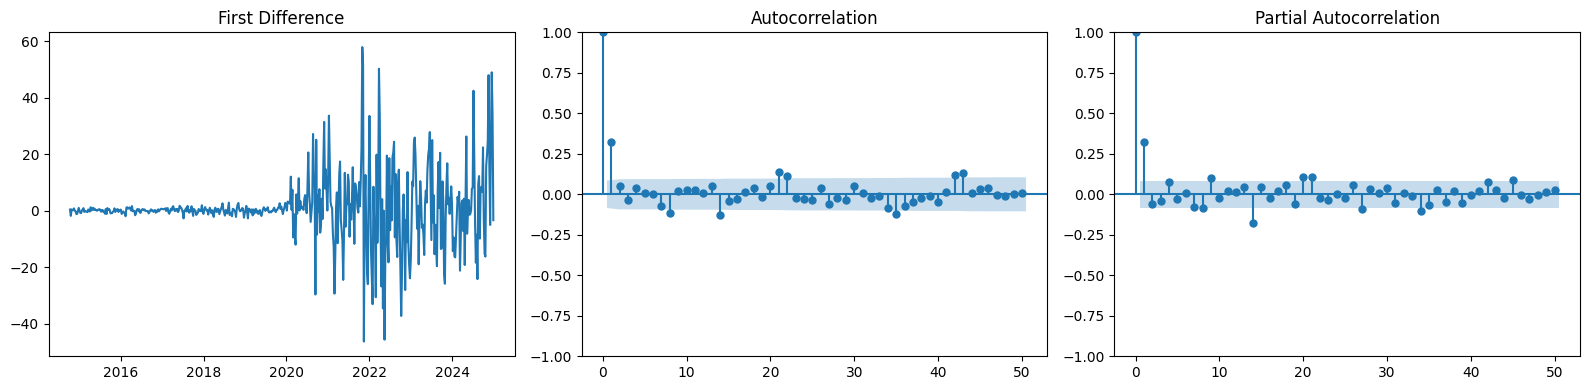


🔍 Top 3 ARIMA models for Period 3:
  Top 1: Order=(6, 1, 8), AIC=4023.293
  Top 2: Order=(8, 1, 7), AIC=4024.264
  Top 3: Order=(6, 1, 7), AIC=4026.793


In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import os, warnings, gc
warnings.filterwarnings("ignore")

# --- Load Tesla data (with correct date format) ---
tesla = pd.read_csv("Tesla_stock.csv", parse_dates=["Date"], date_format="%d/%m/%Y")
tesla.set_index('Date', inplace=True)

# Filter date range from 2014-10-01 to 2024-12-30
start_date = pd.to_datetime("2014-10-01")
end_date = pd.to_datetime("2024-12-30")
tesla = tesla.loc[(tesla.index >= start_date) & (tesla.index <= end_date)]

# Optional: Resample weekly to reduce computation
tesla = tesla.resample('W').mean().dropna()

# Ensure output directory
os.makedirs("figures", exist_ok=True)

# ✅ Updated Tesla periods aligned to new range
periods = {
    'Period 1': ('2014-10-01', '2019-06-30'),
    'Period 2': ('2019-07-01', '2024-12-30'),
    'Period 3': ('2014-10-01', '2024-12-30'),
}

# --- ACF, PACF, First Difference Plot ---
def plot_acf_pacf_first_diff(df, label):
    diff = df.diff().dropna()

    fig, axs = plt.subplots(1, 3, figsize=(16, 4))
    axs[0].plot(diff)
    axs[0].set_title("First Difference")

    plot_acf(diff, ax=axs[1], lags=50)
    axs[1].set_title("Autocorrelation")

    plot_pacf(diff, ax=axs[2], lags=50)
    axs[2].set_title("Partial Autocorrelation")

    plt.tight_layout()
    path = f"figures/tesla_{label.replace(' ', '_').lower()}_acf_pacf_diff.png"
    plt.savefig(path)
    plt.show()

# --- Grid Search ARIMA(p,1,q) ---
def grid_search_arima(df, label):
    results = []
    for p in range(6, 9):
        for q in range(6, 9):
            try:
                model = ARIMA(df, order=(p, 1, q)).fit()
                aic = model.aic
                results.append(((p, 1, q), aic))
                del model
                gc.collect()
            except:
                continue
    sorted_models = sorted(results, key=lambda x: x[1])
    print(f"\n🔍 Top 3 ARIMA models for {label}:")
    for i, (params, aic) in enumerate(sorted_models[:3], 1):
        print(f"  Top {i}: Order={params}, AIC={aic:.3f}")
    return sorted_models[:3]

# --- Run for Tesla ---
tesla_arima_results = {}
for label, (start, end) in periods.items():
    print(f"\n--- {label} ({start} to {end}) ---")
    close = tesla['Close'].loc[start:end].dropna()
    plot_acf_pacf_first_diff(close, label)
    tesla_arima_results[label] = grid_search_arima(close, label)


In [18]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.stats.diagnostic import acorr_ljungbox
from scipy.stats import jarque_bera
from google.colab import files

# ✅ Final Best ARIMA Models with Correct Date Ranges
best_models = {
    'Bitcoin': {
        'Period 1': ((10, 1, 8), '2014-10-01', '2019-08-31'),
        'Period 2': ((8, 1, 9), '2019-09-01', '2024-12-30'),
        'Period 3': ((10, 1, 9), '2014-10-01', '2024-12-30')
    },
    'Tesla': {
        'Period 1': ((7, 1, 8), '2014-10-01', '2019-06-30'),
        'Period 2': ((6, 1, 7), '2019-07-01', '2024-12-30'),
        'Period 3': ((6, 1, 8), '2014-10-01', '2024-12-30')
    }
}

# ✅ Full Top 3 ARIMA Results with AICs
btc_arima_results = {
    'Period 1': [((10, 1, 8), 25228.322), ((9, 1, 8), 25238.946), ((9, 1, 10), 25239.133)],
    'Period 2': [((8, 1, 9), 33366.128), ((10, 1, 8), 33367.297), ((9, 1, 9), 33368.268)],
    'Period 3': [((10, 1, 9), 61832.672), ((9, 1, 8), 61838.367), ((8, 1, 9), 61839.293)]
}

tesla_arima_results = {
    'Period 1': [((7, 1, 8), 641.108), ((6, 1, 6), 645.513), ((8, 1, 6), 645.695)],
    'Period 2': [((6, 1, 7), 2345.246), ((6, 1, 8), 2345.509), ((8, 1, 7), 2347.520)],
    'Period 3': [((6, 1, 8), 4023.293), ((8, 1, 7), 4024.264), ((6, 1, 7), 4026.793)]
}

# 📂 Load and parse data
btc = pd.read_csv("Bitcoin_data.csv", parse_dates=["Date"], date_format="%d/%m/%Y")
tesla = pd.read_csv("Tesla_stock.csv", parse_dates=["Date"], date_format="%d/%m/%Y")

btc.set_index("Date", inplace=True)
tesla.set_index("Date", inplace=True)

# ✅ Filter to global range (if not already)
btc = btc.loc["2014-10-01":"2024-12-30"]
tesla = tesla.loc["2014-10-01":"2024-12-30"]

# 🧠 Collect results
all_results = []

# 🔁 Evaluate ARIMA models
for asset, models in best_models.items():
    df = btc if asset == "Bitcoin" else tesla

    for period, (order, start, end) in models.items():
        print(f"Fitting {asset} - {period} - Order {order}")

        series = df['Close'].loc[start:end].dropna()
        model = ARIMA(series, order=order).fit()
        resid = model.resid.dropna()

        # Diagnostic metrics
        ljung_q = acorr_ljungbox(resid, lags=[1], return_df=True)['lb_pvalue'].values[0]
        jb_stat, jb_p = jarque_bera(resid)

        all_results.append({
            'Asset': asset,
            'Time Frame': period,
            'Best Model': str(order),
            'Log Likelihood': round(model.llf, 3),
            'AIC': round(model.aic, 3),
            'BIC': round(model.bic, 3),
            'Ljung-Box (Q)': round(ljung_q, 2),
            'Jarque-Bera (JB)': round(jb_stat, 2)
        })

# 📋 Save diagnostics
df_combined = pd.DataFrame(all_results)
df_combined = df_combined.sort_values(by=["Asset", "Time Frame"])
diagnostic_path = "bitcoin_tesla_arima_diagnostics.csv"
df_combined.to_csv(diagnostic_path, index=False)
files.download(diagnostic_path)

# 📋 Save full top-3 ARIMA AIC results
def save_top3_to_csv(result_dict, asset_name):
    rows = []
    for period, entries in result_dict.items():
        for i, (order, aic) in enumerate(entries, 1):
            rows.append([asset_name, period, f"Top {i}", order, aic])
    return pd.DataFrame(rows, columns=["Asset", "Period", "Rank", "ARIMA Order", "AIC"])

btc_df = save_top3_to_csv(btc_arima_results, "Bitcoin")
tesla_df = save_top3_to_csv(tesla_arima_results, "Tesla")
df_top3 = pd.concat([btc_df, tesla_df])
top3_path = "bitcoin_tesla_top3_arima_models.csv"
df_top3.to_csv(top3_path, index=False)
files.download(top3_path)


Fitting Bitcoin - Period 1 - Order (10, 1, 8)
Fitting Bitcoin - Period 2 - Order (8, 1, 9)
Fitting Bitcoin - Period 3 - Order (10, 1, 9)
Fitting Tesla - Period 1 - Order (7, 1, 8)
Fitting Tesla - Period 2 - Order (6, 1, 7)
Fitting Tesla - Period 3 - Order (6, 1, 8)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [20]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.stats.diagnostic import acorr_ljungbox
from scipy.stats import jarque_bera
from google.colab import files

# ✅ Aligned best models based on updated results and global date range (2014-10-01 to 2024-12-30)
best_models = {
    'Bitcoin': {
        'Period 1': ((10, 1, 8), '2014-10-01', '2019-08-31'),
        'Period 2': ((8, 1, 9), '2019-09-01', '2024-12-30'),
        'Period 3': ((10, 1, 9), '2014-10-01', '2024-12-30')
    },
    'Tesla': {
        'Period 1': ((7, 1, 8), '2014-10-01', '2019-06-30'),
        'Period 2': ((6, 1, 7), '2019-07-01', '2024-12-30'),
        'Period 3': ((6, 1, 8), '2014-10-01', '2024-12-30')
    }
}

# 📂 Load and parse data
btc = pd.read_csv("Bitcoin_data.csv", parse_dates=["Date"], date_format="%d/%m/%Y")
tesla = pd.read_csv("Tesla_stock.csv", parse_dates=["Date"], date_format="%d/%m/%Y")

btc.set_index('Date', inplace=True)
tesla.set_index('Date', inplace=True)

# Filter both assets to the global analysis range
global_start = pd.to_datetime("2014-10-01")
global_end = pd.to_datetime("2024-12-30")

btc = btc.loc[(btc.index >= global_start) & (btc.index <= global_end)]
tesla = tesla.loc[(tesla.index >= global_start) & (tesla.index <= global_end)]

# 🧠 Store results
all_results = []

# 🔁 Evaluate ARIMA models with updated configurations
for asset, models in best_models.items():
    df = btc if asset == "Bitcoin" else tesla

    for period, (order, start, end) in models.items():
        print(f"Fitting {asset} - {period} - Order {order}")
        series = df['Close'].loc[start:end].dropna()

        model = ARIMA(series, order=order).fit()
        resid = model.resid.dropna()

        # Statistical diagnostics
        ljung_q = acorr_ljungbox(resid, lags=[1], return_df=True)['lb_pvalue'].values[0]
        jb_stat, jb_p = jarque_bera(resid)

        all_results.append({
            'Asset': asset,
            'Time Frame': period,
            'Best Model': str(order),
            'Log Likelihood': round(model.llf, 3),
            'AIC': round(model.aic, 3),
            'BIC': round(model.bic, 3),
            'Ljung-Box (Q)': round(ljung_q, 2),
            'Jarque-Bera (JB)': round(jb_stat, 2)
        })

# 📋 Combine and save results
df_combined = pd.DataFrame(all_results)
df_combined = df_combined.sort_values(by=["Asset", "Time Frame"])
output_path = "bitcoin_tesla_final_arima_diagnostics.csv"
df_combined.to_csv(output_path, index=False)

# 📥 Download the CSV file
files.download(output_path)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [22]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.stats.diagnostic import acorr_ljungbox
from scipy.stats import jarque_bera
from google.colab import files

# ✅ Aligned best models based on updated results and global date range (2014-10-01 to 2024-12-30)
best_models = {
    'Bitcoin': {
        'Period 1': ((10, 1, 8), '2014-10-01', '2019-08-31'),
        'Period 2': ((8, 1, 9), '2019-09-01', '2024-12-30'),
        'Period 3': ((10, 1, 9), '2014-10-01', '2024-12-30')
    },
    'Tesla': {
        'Period 1': ((7, 1, 8), '2014-10-01', '2019-06-30'),
        'Period 2': ((6, 1, 7), '2019-07-01', '2024-12-30'),
        'Period 3': ((6, 1, 8), '2014-10-01', '2024-12-30')
    }
}

# 📂 Load and parse data
btc = pd.read_csv("Bitcoin_data.csv", parse_dates=["Date"], date_format="%d/%m/%Y")
tesla = pd.read_csv("Tesla_stock.csv", parse_dates=["Date"], date_format="%d/%m/%Y")

btc.set_index('Date', inplace=True)
tesla.set_index('Date', inplace=True)

# Filter both assets to the global analysis range
global_start = pd.to_datetime("2014-10-01")
global_end = pd.to_datetime("2024-12-30")

btc = btc.loc[(btc.index >= global_start) & (btc.index <= global_end)]
tesla = tesla.loc[(tesla.index >= global_start) & (tesla.index <= global_end)]

# 🧠 Store results
all_results = []

# 🔁 Evaluate ARIMA models with updated configurations
for asset, models in best_models.items():
    df = btc if asset == "Bitcoin" else tesla

    for period, (order, start, end) in models.items():
        print(f"Fitting {asset} - {period} - Order {order}")
        series = df['Close'].loc[start:end].dropna()

        model = ARIMA(series, order=order).fit()
        resid = model.resid.dropna()

        # Statistical diagnostics
        ljung_q = acorr_ljungbox(resid, lags=[1], return_df=True)['lb_pvalue'].values[0]
        jb_stat, jb_p = jarque_bera(resid)

        all_results.append({
            'Asset': asset,
            'Time Frame': period,
            'Best Model': str(order),
            'Log Likelihood': round(model.llf, 3),
            'AIC': round(model.aic, 3),
            'BIC': round(model.bic, 3),
            'Ljung-Box (Q)': round(ljung_q, 2),
            'Jarque-Bera (JB)': round(jb_stat, 2)
        })

# 📋 Combine and save results
df_combined = pd.DataFrame(all_results)
df_combined = df_combined.sort_values(by=["Asset", "Time Frame"])
output_path = "bitcoin_tesla_final_arima_diagnostics.csv"
df_combined.to_csv(output_path, index=False)

# 📥 Download the CSV file
files.download(output_path)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [23]:
import pandas as pd

# Define the LSTM configuration table
lstm_table = pd.DataFrame({
    "Model Type": ["Simple LSTM", "Stacked LSTM 1", "Stacked LSTM 2"],
    "Hidden Layers": [0, 1, 2],
    "Drop-Out layer": ["None", "P=0.2", "P=0.2"],
    "Activation Function": ["None", "ReLU", "ReLU"],
    "Kernel Regularizer": ["None", "L2(0.001)", "L2(0.001)"],
    "Optimizer": ["Adam"]*3,
    "Learning Rate": [0.001]*3,
    "Loss Function": ["MSE"]*3,
    "Batch size": [32]*3
})

# Preview the table
lstm_table


,Model Type,Hidden Layers,Drop-Out layer,Activation Function,Kernel Regularizer,Optimizer,Learning Rate,Loss Function,Batch size
0,Simple LSTM,0,None,None,None,Adam,0.001,MSE,32
1,Stacked LSTM 1,1,P=0.2,ReLU,L2(0.001),Adam,0.001,MSE,32
2,Stacked LSTM 2,2,P=0.2,ReLU,L2(0.001),Adam,0.001,MSE,32


In [24]:
lstm_table.to_csv("lstm_model_hyperparameters.csv", index=False)

from google.colab import files
files.download("lstm_model_hyperparameters.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [25]:
import pandas as pd

# Define feature sets for multivariate forecasting
feature_sets = {
    "Set 1": ["Close", "Returns"],
    "Set 2": ["Close", "EMA12", "EMA26", "EMA48", "EMA220"],
    "Set 3": ["Close", "SMA12", "SMA26", "SMA20", "SMA48", "SMA220"],
    "Set 4": ["Close", "RSI", "MACD"],
    "Set 5": ["Close", "Bollinger Upper", "Bollinger Lower"],
    "Set 6": ["Close", "EMA12", "EMA26", "EMA48", "EMA220", "SMA12", "SMA26", "SMA20", "SMA48", "SMA220", "Bollinger Upper", "Bollinger Lower"],
    "Set 7": ["Close", "EMA12", "EMA26", "EMA48", "EMA220", "SMA12", "SMA26", "SMA20", "SMA48", "SMA220", "Bollinger Upper", "Bollinger Lower", "RSI", "MACD"]
}

# Convert to DataFrame for display/export
df_features = pd.DataFrame({
    "Set": feature_sets.keys(),
    "Features Used": [", ".join(f) for f in feature_sets.values()]
})

df_features.to_csv("lstm_forecasting_feature_sets.csv", index=False)

from google.colab import files
files.download("lstm_forecasting_feature_sets.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>